## SVM
### Alicia Brown
#### 143960

### Paquetes necesarios

In [1]:
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf

### Lectura de datos

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/andSVM_2.csv")
df

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,2,3,1
5,3,2,1
6,0,-1,0


In [3]:
X = np.asarray(df[df.columns[0:-1]])
y = np.asarray(df['y'])

### Gráfica de separación

In [4]:
clf = svm.LinearSVC()
clf.fit(X, y)
error = np.mean((clf.predict(X)-y)**2)*100
print("Error cuadratico medio:",error,"%")

('Error cuadratico medio:', 0.0, '%')


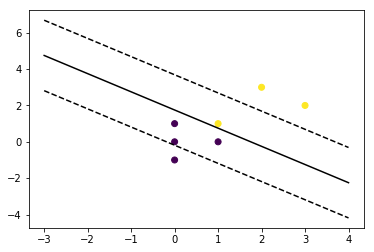

In [5]:
w = clf.coef_[0]
m = -w[0] / w[1]
equis = np.linspace(-3,4)
yes = m * equis - (clf.intercept_[0]) / w[1]
boundary = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
sv1 = yes - np.sqrt(1 + m ** 2) * boundary
sv2 = yes + np.sqrt(1 + m ** 2) * boundary

plt.clf()
plt.plot(equis, yes, 'k')
plt.plot(equis, sv1, 'k--')
plt.plot(equis, sv2, 'k--')
plt.scatter(X[:,0],X[:,1],c=y)

plt.show()

In [6]:
# Funciones encontradas en: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [7]:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

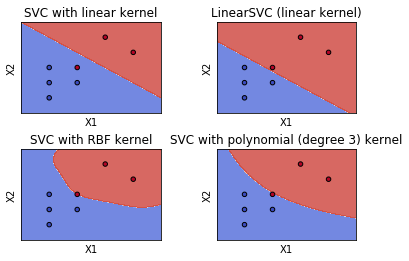

In [8]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:,0], X[:,1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

### Comparación con NN

#### NN

In [9]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])
W1 = tf.Variable(tf.random_uniform([2, 3], -1, 1))
b1 = tf.Variable(tf.zeros([1, 3]))
W2 = tf.Variable(tf.random_uniform([3, 1], -1, 1))
b2 = tf.Variable(tf.zeros([1, 1]))

In [10]:
h = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
yhat = tf.nn.sigmoid(tf.matmul(h, W2) + b2)
ecm = tf.reduce_mean(tf.reduce_sum(tf.square(y - yhat)))
train_step = tf.train.GradientDescentOptimizer(0.03).minimize(ecm)

In [11]:
def circulo(X1, X2):
    if X1*X1 + X2*X2 < 1:
        return 1
    else:
        return 0

In [28]:
n = 100
X1 = np.resize(np.random.uniform(-2, 2, n), (n,1))
X2 = np.resize(np.random.uniform(-2, 2, n), (n,1))
XX = np.concatenate((X1, X2), axis = 1)
yy = np.resize([circulo(X1[i], X2[i]) for i in range(len(X1))], (n,1))

In [29]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for k in range(10000):
    sess.run(train_step, feed_dict={x: XX, y: yy})

In [30]:
correct_prediction = tf.equal(tf.round(yhat), yy)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: XX, y: yy}))

1.0


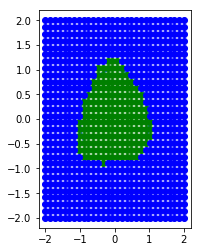

In [31]:
xs = np.linspace(-2, 2,30)
ys = np.linspace(-2, 2,30)
pred_classes = []
for i in xs:
    for j in ys:
        pred_class = sess.run(yhat, feed_dict={x: [[i, j]]})
        pred_classes.append((i, j, np.around(pred_class)))
xs_p, ys_p = [], []
xs_n, ys_n = [], []
for i, j, c in pred_classes:
    if c == 0.:
        xs_n.append(i)
        ys_n.append(j)
    else:
        xs_p.append(i)
        ys_p.append(j)
plt.subplot(1,2,2)
plt.plot(np.sin(xs),np.cos(ys), linewidth=2)
plt.plot(xs_p, ys_p, 'go', xs_n, ys_n, 'bo')
plt.show()

#### SVM

In [32]:
clf = svm.LinearSVC(C=1.0)
clf.fit(XX, yy.ravel())

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

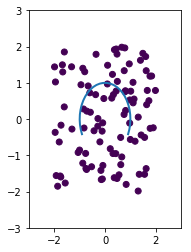

In [34]:
plt.subplot(1,2,2)
plt.plot(np.sin(xs),np.cos(xs), linewidth=2)
ypred = clf.predict(XX)
plt.scatter(X1,X2,c=ypred)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()